<a href="https://colab.research.google.com/github/OthmanBentir/Stock-Price-Prediction-Using-LSTM/blob/main/Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Data Collection
Objective: Obtaining historical stock price data for training and testing the model.


*   Source: Using Yahoo Finance to download historical data for the stock of Apple (AAPL).
*   Duration: From January 1, 2015, to January 1, 2024.
*   Data Used: Closing prices.



In [ ]:
# Download historical data for a stock, e.g., AAPL
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data = data[['Close']]
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


#Data Preprocessing

Objective: Preparing the data for the LSTM model.

* Normalization: Using MinMaxScaler to normalize the closing prices between 0 and 1.
* Sequence Creation: Converting the time series data into sequences of a fixed length (60 days) for the LSTM model.
* Train-Test Split: Spliting the sequences into training and testing sets (80% training, 20% testing).

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Creating sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return sequences

seq_length = 60
sequences = create_sequences(data['Close'].values, seq_length)

# Spliting into training and testing sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

X_train, y_train = zip(*train_sequences)
X_test, y_test = zip(*test_sequences)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


<ipython-input-5-f636938d7392>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


#Model Building
Objective: Constructing an LSTM model to predict stock prices.

* Architecture:
 * Two LSTM layers with 50 units each.
 * Dropout layer with a 20% dropout rate to prevent overfitting.
 * Two Dense layers for the output.
* Compilation: Using Adam optimizer and mean squared error loss function.

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

#Training the Model
Objective: Training the LSTM model using the prepared training data.

* Batch Size: 32
* Epochs: 50
* Validation: Using the test data for validation during training to monitor performance.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0359 - val_loss: 0.0029
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 8.9868e-04 - val_loss: 0.0011
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.7026e-04 - val_loss: 0.0036
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.8753e-04 - val_loss: 9.6895e-04
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 6.8058e-04 - val_loss: 0.0012
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 6

#Evaluation and Visualization

Objective: Evaluating the model’s performance and visualize the predictions.

* Prediction: Generating predictions for both the training and test sets.
* Inverse Transform: Converting the normalized predictions back to the original scale using the scaler.
* Visualization: Plot actual vs. predicted prices for both training and test datasets.

56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


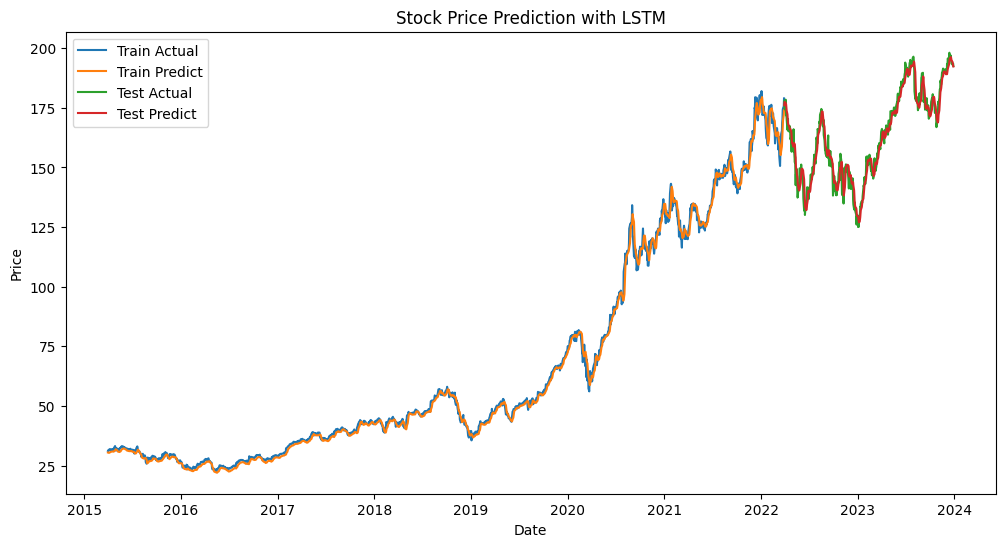

In [ ]:
# Evaluating the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:seq_length+len(y_train)], y_train_actual, label='Train Actual')
plt.plot(data.index[seq_length:seq_length+len(y_train)], train_predict, label='Train Predict')
plt.plot(data.index[seq_length+len(y_train):], y_test_actual, label='Test Actual')
plt.plot(data.index[seq_length+len(y_train):], test_predict, label='Test Predict')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


#Accuracy
Objective: Assess the model’s accuracy using various metrics.

* Metrics: Calculate RMSE, MAE, and MAPE for both training and test sets to quantify prediction errors.

In [ ]:
# Calculating RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))

# Calculating  MAE
train_mae = mean_absolute_error(y_train_actual, train_predict)
test_mae = mean_absolute_error(y_test_actual, test_predict)

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Training MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

# Calculating MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train_actual, train_predict)
test_mape = mean_absolute_percentage_error(y_test_actual, test_predict)

print(f'Training MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')


Training RMSE: 2.19
Test RMSE: 3.80
Training MAE: 1.51
Test MAE: 3.02
Training MAPE: 2.54%
Test MAPE: 1.91%
